In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style = 'whitegrid')

from sklearn.impute import SimpleImputer

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

In [2]:
plt.rcParams['figure.figsize'] = (15,8)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
ytest = pd.read_csv('sample_submission.csv')
ytest.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [5]:
test = pd.concat((test,ytest.drop('Id',axis=1)),axis=1)

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data Cleaning

### For Train Data

In [9]:
# Dropping the numeric columns having standard deviation equal to zero.
dropped_col =[]
for i in train.select_dtypes('int64').columns:
    if train[i].std() ==0:
        dropped_col.append(i)
        train.drop(i,axis=1,inplace=True)

In [10]:
train.drop_duplicates(inplace=True)

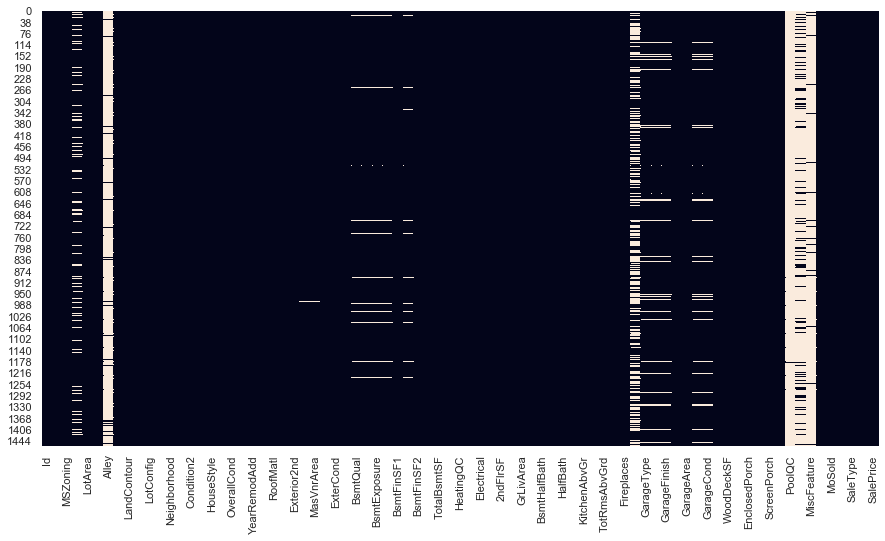

In [11]:
plt.figure(figsize = (15,8))
sns.heatmap(train.isnull(),cbar = False);

In [12]:
na = pd.DataFrame(train.isnull().sum(),columns=['null_perc'])
na_count = na[na['null_perc'] != 0]/len(train)
na_count.sort_values('null_perc',ascending = False).head()

,null_perc
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
FireplaceQu,0.472603


In [13]:
train = train.drop(['Id','Alley','PoolQC','MiscFeature'],axis =1) 
## Dropping columns having null value percentage greater than 90%.

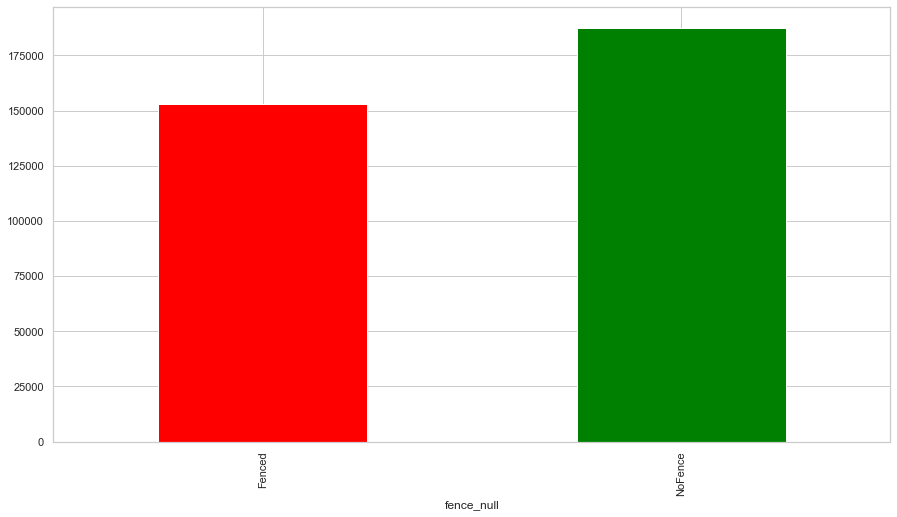

In [14]:
train_cp = train.copy()
train_cp['fence_null'] = np.where(train.Fence.isnull(),'NoFence','Fenced')
train_cp.groupby('fence_null')['SalePrice'].mean().plot(kind='bar',color=['red','green'])
plt.show()

In [15]:
train.Fence.fillna('NoFence',inplace=True)

In [16]:
na = pd.DataFrame(train.isnull().sum(),columns=['null_perc'])
na_count = na[na['null_perc'] != 0]/len(train)
na_count.sort_values('null_perc',ascending = False).head(3)

,null_perc
FireplaceQu,0.472603
LotFrontage,0.177397
GarageType,0.055479


In [17]:
train.FireplaceQu.fillna('None',inplace=True)

In [18]:
na = pd.DataFrame(train.isnull().sum(),columns=['null_perc'])
na_count = na[na['null_perc'] != 0]/len(train)
na_count.sort_values('null_perc',ascending = False).head()

,null_perc
LotFrontage,0.177397
GarageType,0.055479
GarageYrBlt,0.055479
GarageFinish,0.055479
GarageQual,0.055479


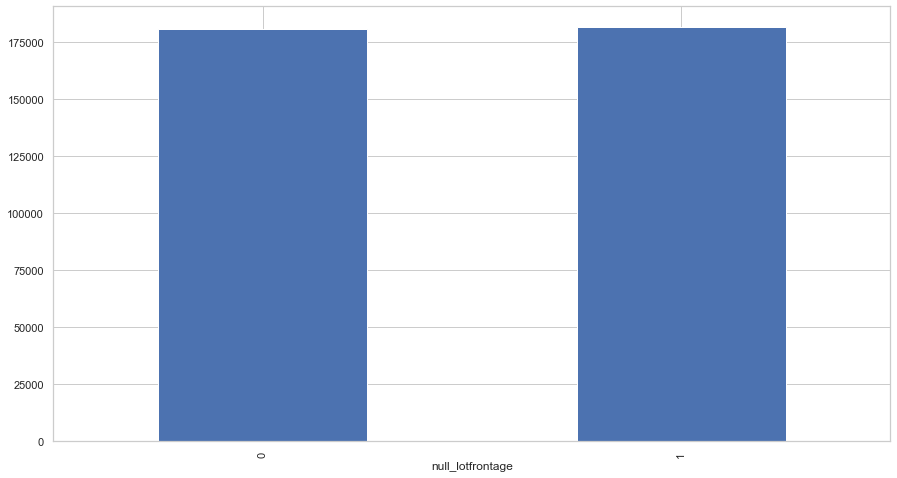

In [19]:
df_train = train.copy()
df_train['null_lotfrontage'] = np.where(train.LotFrontage.isnull(),1,0)
df_train.groupby('null_lotfrontage')['SalePrice'].mean().plot(kind='bar')
plt.show()

In [20]:
# There is no signoficance of null values of lotfrontage column as the mean is equal

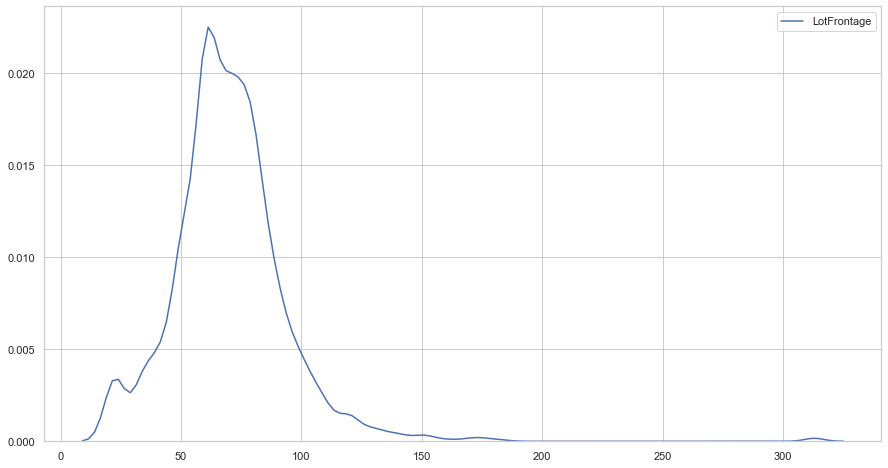

In [22]:
sns.kdeplot(train.LotFrontage)
plt.show()

In [23]:
#As the data is skewed we will replace null values with median.

In [24]:
train.LotFrontage.fillna(train.LotFrontage.median(),inplace=True)

In [25]:
def remove_na(data,feature_string_check):
    features = [i for i in data.columns if i[0:len(feature_string_check)] == feature_string_check]
    for i in data[features].columns:
        if data[i].dtype == 'O':
            data[i].fillna('None',inplace=True)
        else:
            data[i].fillna(0,inplace=True)
    return

In [26]:
remove_na(train,'Garage')
remove_na(train,'Bsmt')
remove_na(train,'MasVnr')

In [27]:
na = pd.DataFrame(train.isnull().sum(),columns=['null_perc'])
na_count = na[na['null_perc'] != 0]/len(train)
na_count.sort_values('null_perc',ascending = False).head()

,null_perc
Electrical,0.000685


In [ ]:
train.dropna(inplace=True)

### For Test Data

In [33]:
# Dropping the numeric columns having standard deviation equal to zero.
for i in test.select_dtypes('int64'):
    if test[i].std() ==0:
        test.drop(i,axis=1)

In [34]:
test.drop_duplicates(inplace=True)

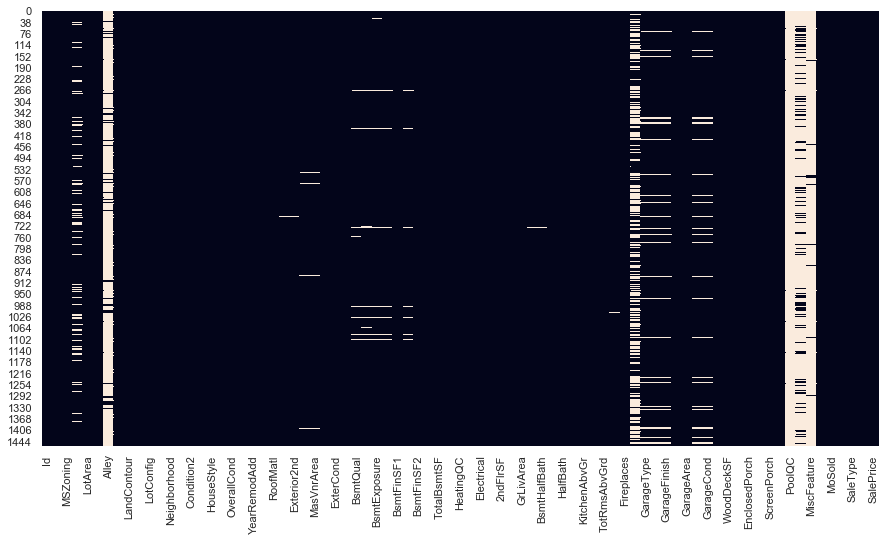

In [35]:
plt.figure(figsize = (15,8))
sns.heatmap(test.isnull(),cbar = False);

In [36]:
na = pd.DataFrame(test.isnull().sum(),columns=['null_perc'])
na_count = na[na['null_perc'] != 0]/len(test)
na_count.sort_values('null_perc',ascending = False).head()

,null_perc
PoolQC,0.997944
MiscFeature,0.965045
Alley,0.926662
Fence,0.801234
FireplaceQu,0.500343


In [37]:
test = test.drop(['Alley','PoolQC','MiscFeature'],axis =1) 
## Dropping columns having null value percentage greater than 90%.

In [38]:
test.Fence.fillna('NoFence',inplace=True)

In [39]:
test.FireplaceQu.fillna('None',inplace=True)

In [40]:
test.LotFrontage.fillna(test.LotFrontage.median(),inplace=True)

In [41]:
remove_na(test,'Garage')
remove_na(test,'Bsmt')
remove_na(test,'MasVnr')

In [42]:
na = pd.DataFrame(test.isnull().sum(),columns=['null_perc'])
na_count = na[na['null_perc'] != 0]/len(test)
na_count.sort_values('null_perc',ascending = False).head()

,null_perc
MSZoning,0.002742
Utilities,0.001371
Functional,0.001371
Exterior1st,0.000685
Exterior2nd,0.000685


In [43]:
test=test.fillna(method='bfill')

In [44]:
na = pd.DataFrame(test.isnull().sum(),columns=['null_perc'])
na_count = na[na['null_perc'] != 0]/len(test)
na_count.sort_values('null_perc',ascending = False).head()

,null_perc


In [45]:
train.to_csv('train_clean.csv',index=False)
test.to_csv('test_clean.csv',index=False)